## Load Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## Reading the csv file

In [3]:
df = pd.read_csv('heart_dataset.csv')

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
df.shape

(1328, 14)

## Exploring the data set in order to derive useful information

In [6]:
df.shape

(1328, 14)

this shows our data has 303 rows and 14 columns

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

we can see the column names here 

In [8]:
df.describe()

age          sex           cp     trestbps         chol  \
count  1328.000000  1328.000000  1328.000000  1328.000000  1328.000000   
mean     54.418675     0.692771     0.948042   131.614458   246.060241   
std       9.071150     0.461519     1.029854    17.514997    51.627522   
min      29.000000     0.000000     0.000000    94.000000   126.000000   
25%      48.000000     0.000000     0.000000   120.000000   211.000000   
50%      56.000000     1.000000     1.000000   130.000000   240.000000   
75%      61.000000     1.000000     2.000000   140.000000   275.000000   
max      77.000000     1.000000     3.000000   200.000000   564.000000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1328.000000  1328.000000  1328.000000  1328.000000  1328.000000   
mean      0.149096     0.529367   149.235693     0.334337     1.064232   
std       0.356318     0.527220    22.975286     0.471936     1.171519   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1328.000000  1328.000000  1328.000000  1328.000000  
mean      1.388554     0.748494     2.321536     0.520331  
std       0.617203     1.028603     0.618543     0.499775  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

Statstical Details
Describe provides us with statistical information in  the numerical format.
we can infer that in the AGE column the minimum age is 29yrs and maximium is 77yrs 
mean of age is 54yrs.
The quartiles details are given in form of 25%, 50% and 75%. The data is divided into 3 quartiles
or 4 equal parts. so 25% values lie in each group.
standard deviation and mean are statistical measures which give us an idea of the central tendency 
of the data set. However , mean is effected by outliers and hence we need more information 
to make accurate decisions.



In [9]:
# Data set is not imbalanced
df['target'].value_counts()

1    691
0    637
Name: target, dtype: int64

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   int64  
 1   sex       1328 non-null   int64  
 2   cp        1328 non-null   int64  
 3   trestbps  1328 non-null   int64  
 4   chol      1328 non-null   int64  
 5   fbs       1328 non-null   int64  
 6   restecg   1328 non-null   int64  
 7   thalach   1328 non-null   int64  
 8   exang     1328 non-null   int64  
 9   oldpeak   1328 non-null   float64
 10  slope     1328 non-null   int64  
 11  ca        1328 non-null   int64  
 12  thal      1328 non-null   int64  
 13  target    1328 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 145.4 KB
None


we notice that the dataset has no null values.
this saved us from conveting the null values into some data or dropping then altogether.

In [12]:
df['target'].value_counts()

1    691
0    637
Name: target, dtype: int64

## Finding the correlation among the attributes

<AxesSubplot:>

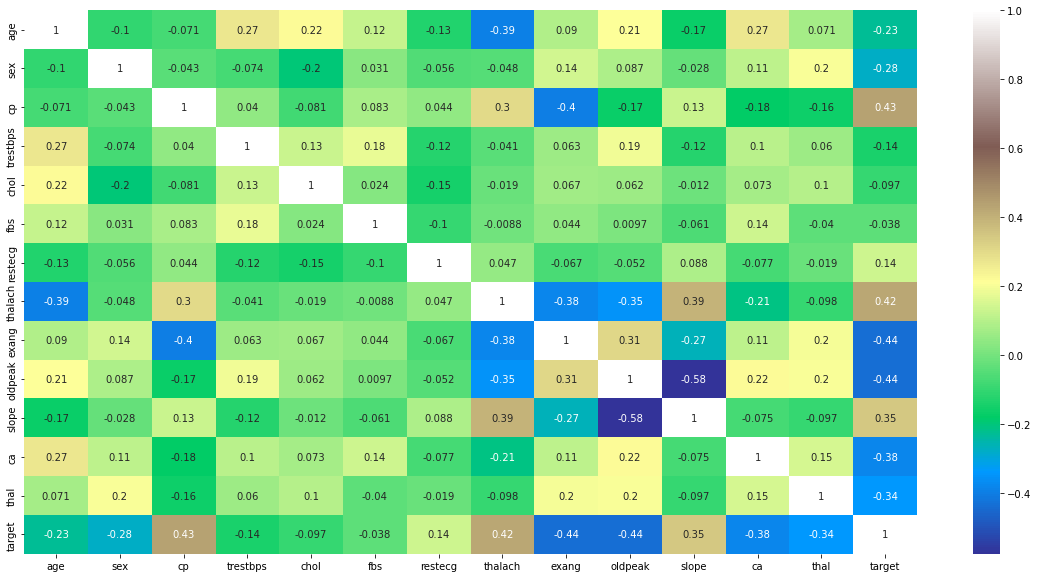

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

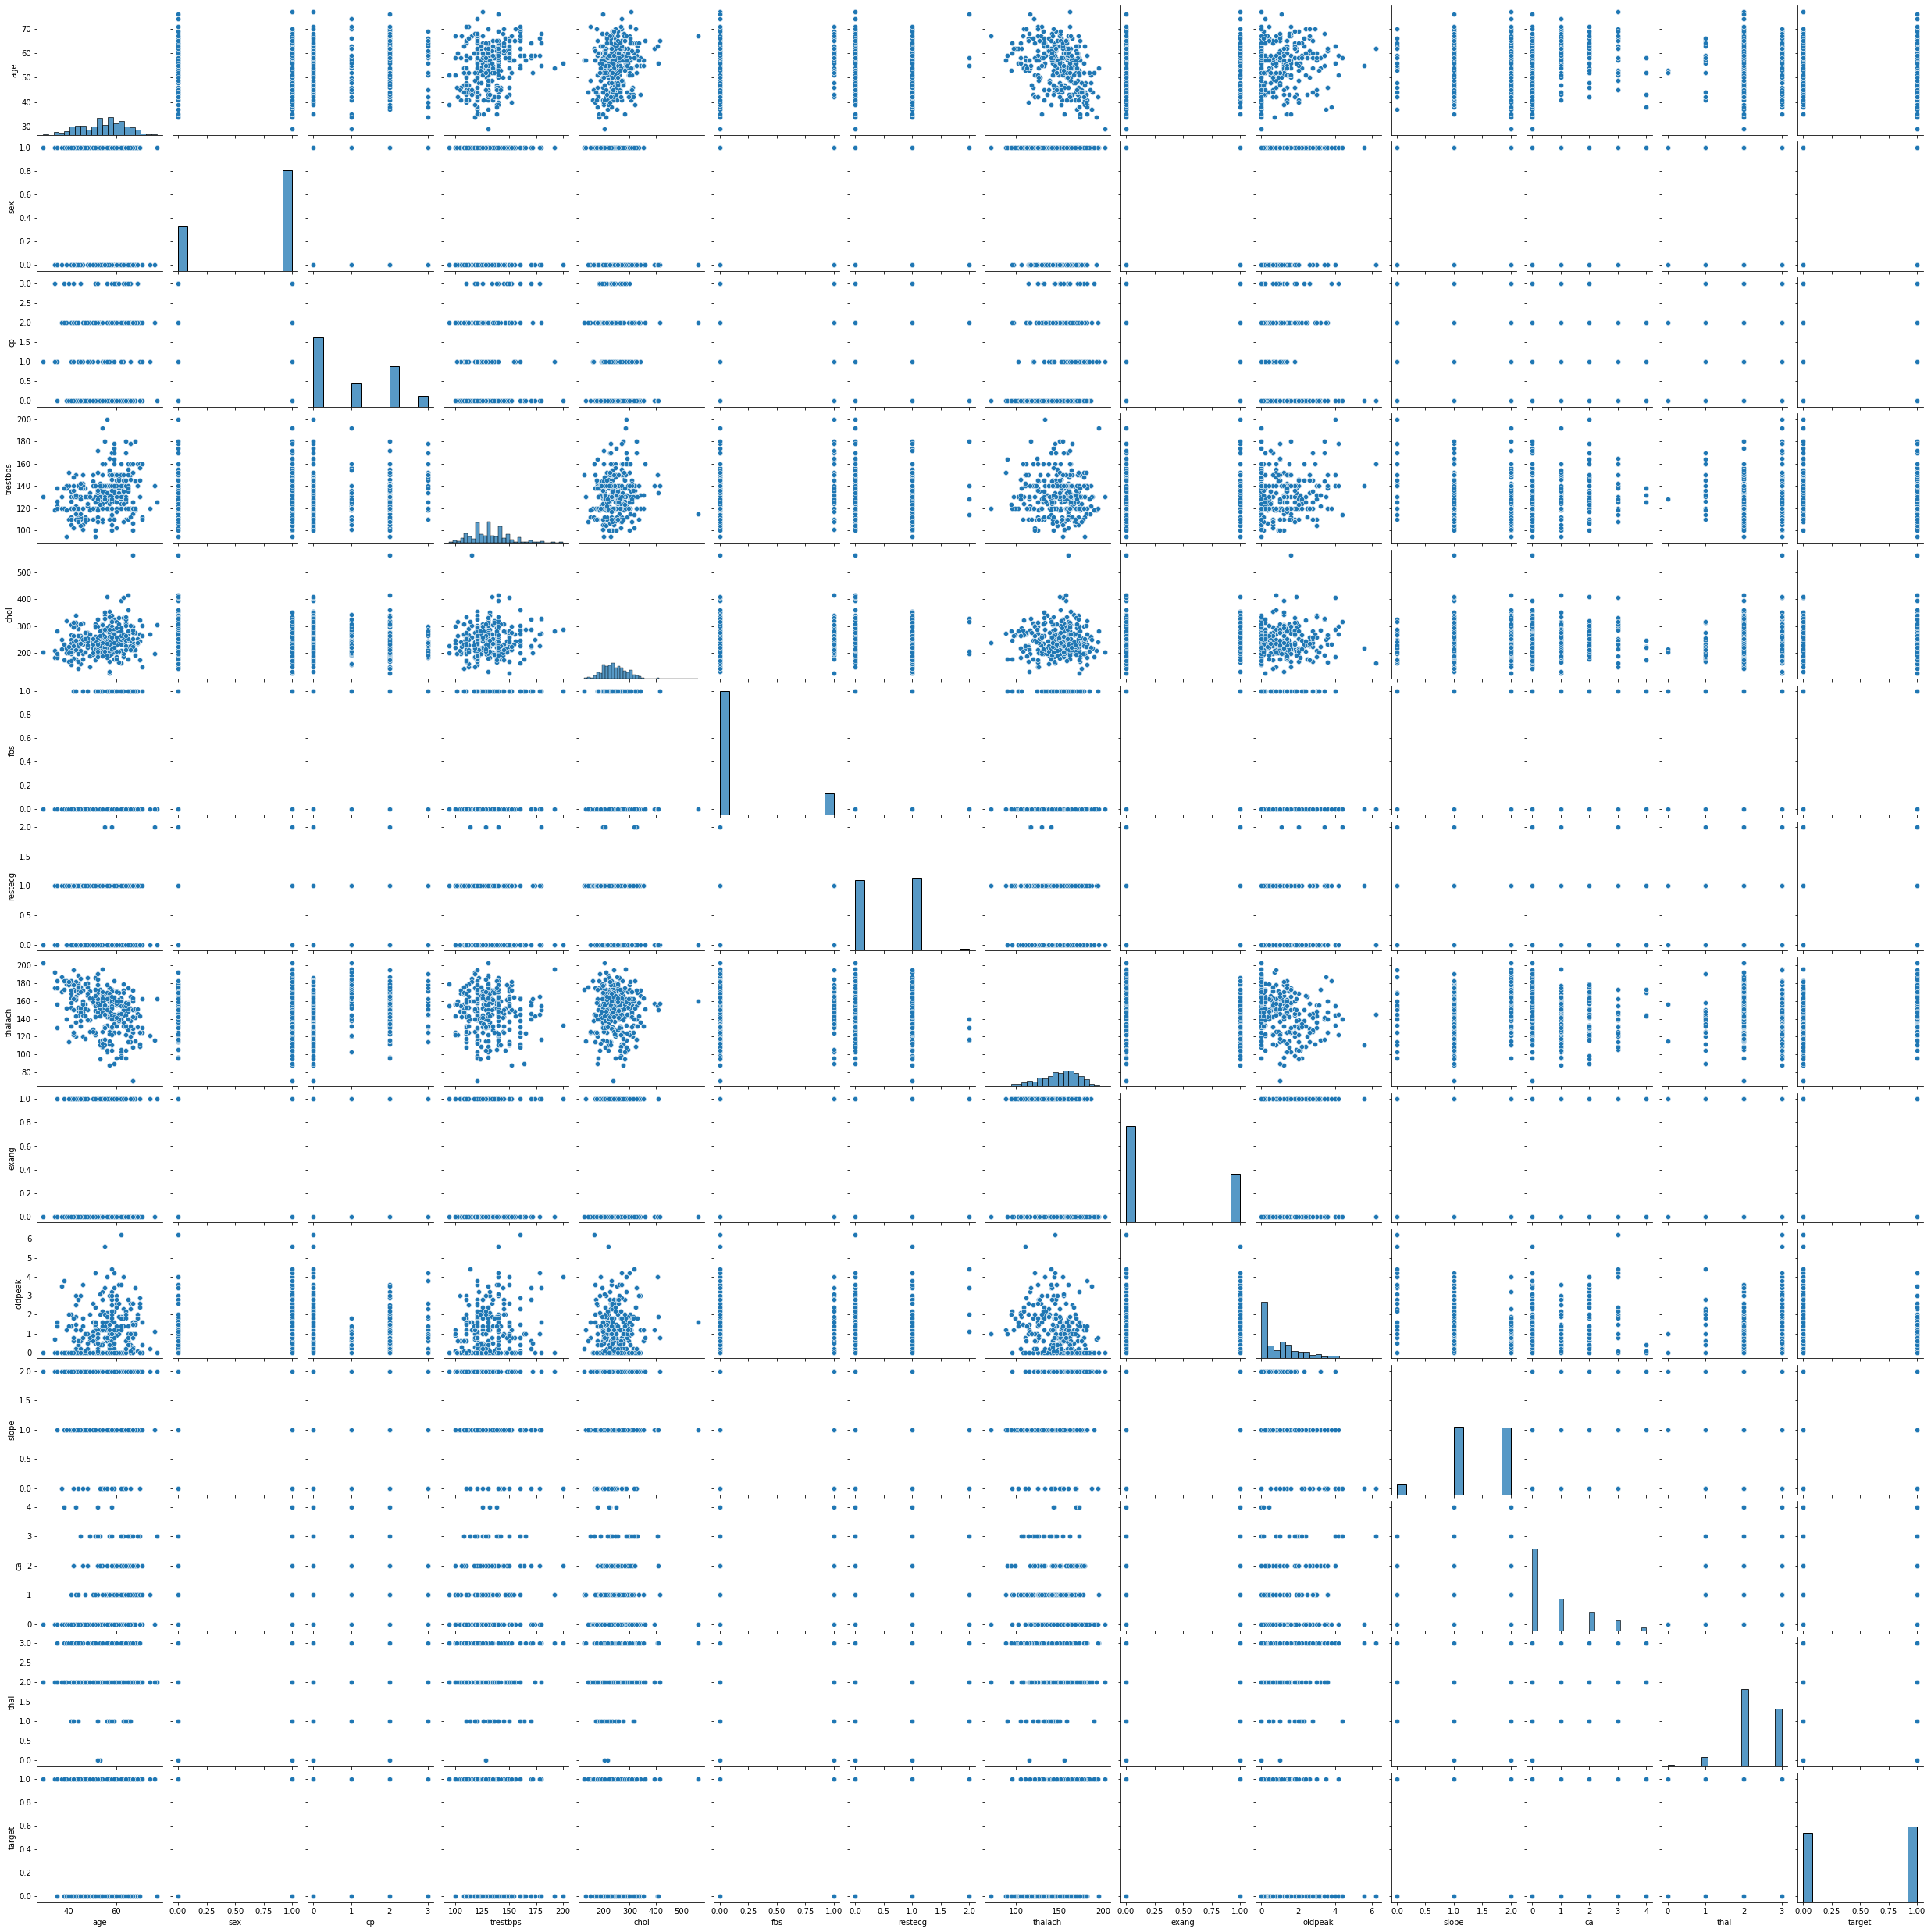

In [14]:
sns.pairplot(data=df)

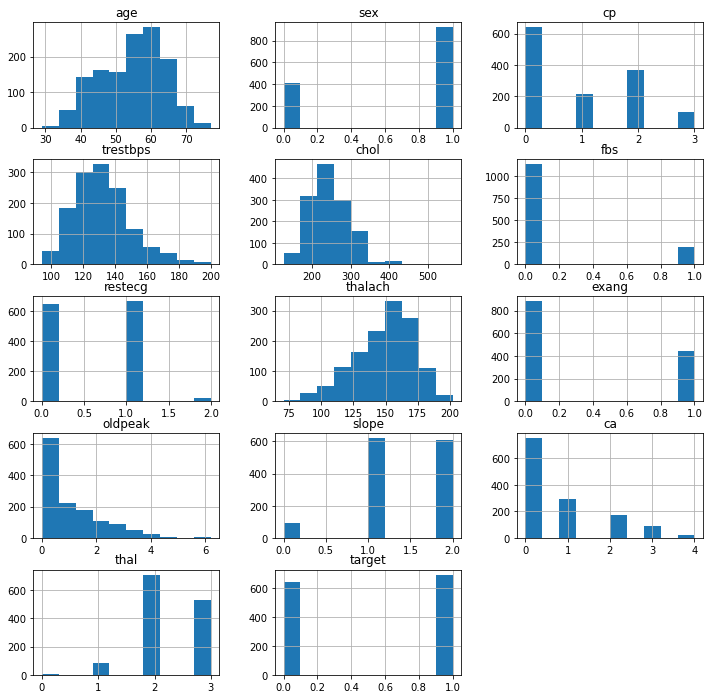

In [15]:
df.hist(figsize=(12,12), layout=(5,3));

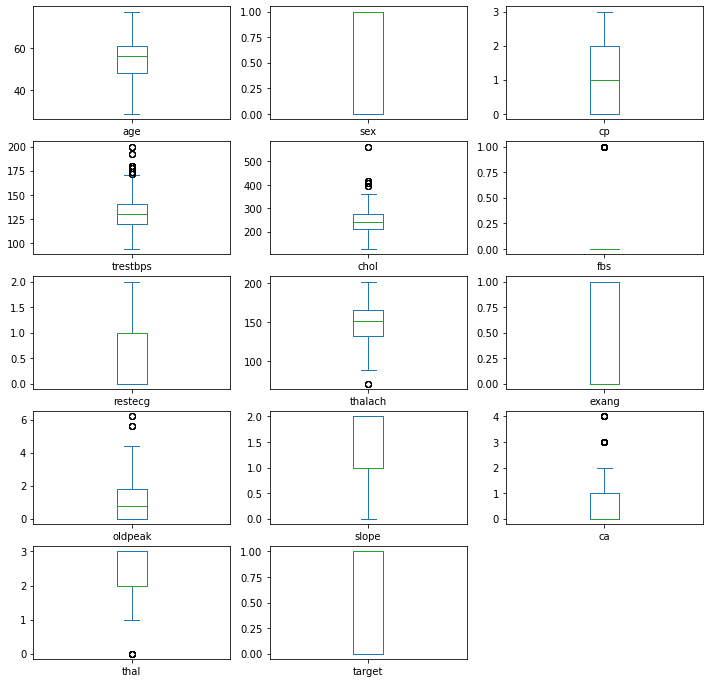

In [16]:
# box and whiskers plot
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

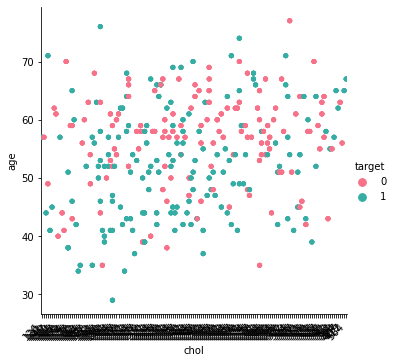

In [17]:
sns.catplot(data=df, x='chol', y='age',  hue='target', palette='husl').set_xticklabels(rotation=45, horizontalalignment='right')

<AxesSubplot:xlabel='sex', ylabel='chol'>

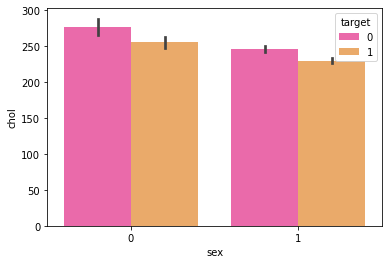

In [18]:
sns.barplot(data=df, x='sex', y='chol', hue='target', palette='spring')

In [19]:
df['sex'].value_counts()

1    920
0    408
Name: sex, dtype: int64

#### 207 males and 96 females

In [20]:
df['target'].value_counts()

1    691
0    637
Name: target, dtype: int64

#### 165 cases of heart diseases
and 138 cases of no heart diseases

In [21]:
df['thal'].value_counts()

2    710
3    527
1     82
0      9
Name: thal, dtype: int64

#### results of thallium stress test measuring blood flow to the heart,
with possible values normal, fixed_defect, reversible_defect

<AxesSubplot:xlabel='sex', ylabel='count'>

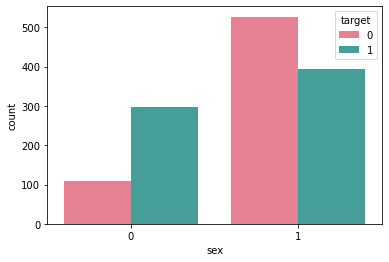

In [22]:
sns.countplot(x='sex', data=df, palette='husl', hue='target')

Here 1 means male and 0 denotes female. 
we observe female having heart disease are comparatively less when compared to males
Males have low heart diseases as compared to females in the given dataset.

<AxesSubplot:xlabel='target', ylabel='count'>

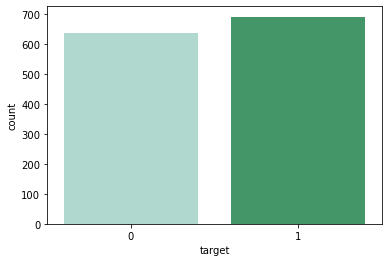

In [23]:
sns.countplot(x='target',palette='BuGn', data=df)

we observe the count for not having heart disease and having heart disease are almost balanced
not having frequency count is 140
and those having heart disease the count is 160.

<AxesSubplot:xlabel='ca', ylabel='count'>

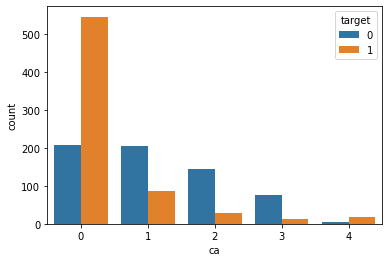

In [24]:
sns.countplot(x='ca',hue='target',data=df)

##### ca : number of major vessels (0-3) colored by flourosopy

In [25]:
df['ca'].value_counts()

0    753
1    291
2    172
3     89
4     23
Name: ca, dtype: int64

ca number of major vessels (0-3) colored by flourosopy
ca has a negative corelation with the target i.e when ca will increase we witness a drop in 
heart diseases and vice versa.

<AxesSubplot:xlabel='thal', ylabel='count'>

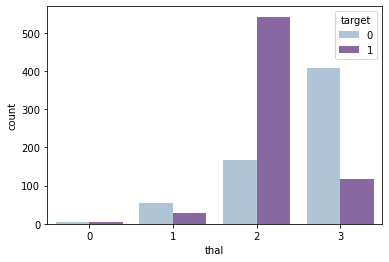

In [26]:
sns.countplot(x='thal',data=df, hue='target', palette='BuPu' )

thal3 = normal; 6 = fixed defect; 7 = reversable defect

<AxesSubplot:xlabel='thal', ylabel='count'>

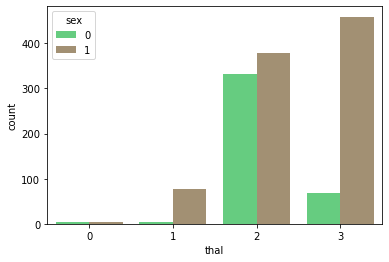

In [27]:
sns.countplot(x='thal', hue='sex',data=df, palette='terrain')

In [28]:
df['cp'].value_counts()  # chest pain type

0    640
2    371
1    217
3    100
Name: cp, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

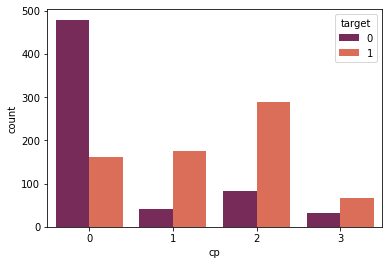

In [29]:
sns.countplot(x='cp' ,hue='target', data=df, palette='rocket')

shows chest pain with respect to heart disease/ target

<AxesSubplot:xlabel='cp', ylabel='count'>

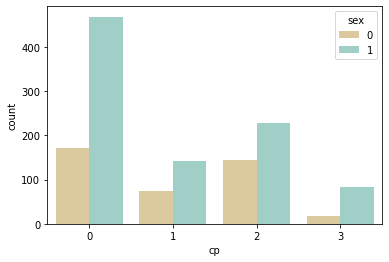

In [30]:
sns.countplot(x='cp', hue='sex',data=df, palette='BrBG')

this shows chest pain count experienced by male and female

<AxesSubplot:xlabel='sex', ylabel='chol'>

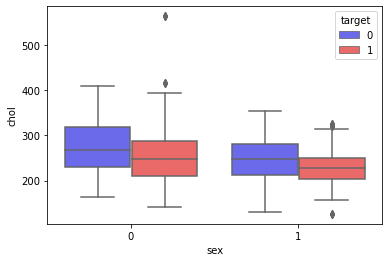

In [31]:
sns.boxplot(x='sex', y='chol', hue='target', palette='seismic', data=df)

we observe the outliers with the help of boxplot. outliers are values that are very small 
or large in the given data set.

<AxesSubplot:xlabel='sex', ylabel='cp'>

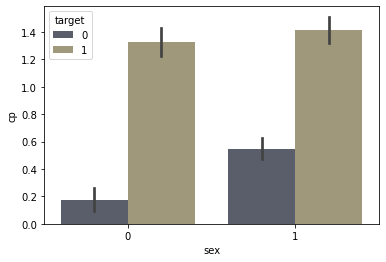

In [32]:
sns.barplot(x='sex', y='cp', hue='target',data=df, palette='cividis')

<AxesSubplot:xlabel='sex', ylabel='thal'>

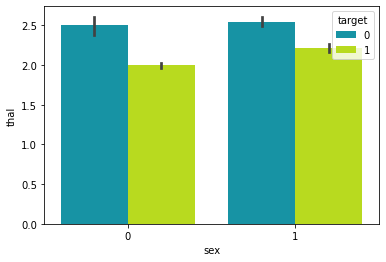

In [33]:
sns.barplot(x='sex', y='thal', data=df, hue='target', palette='nipy_spectral')

<AxesSubplot:xlabel='target', ylabel='ca'>

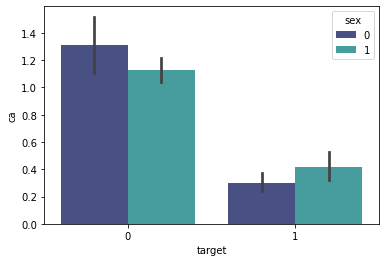

In [34]:
sns.barplot(x='target', y='ca', hue='sex', data=df, palette='mako')

<AxesSubplot:xlabel='sex', ylabel='oldpeak'>

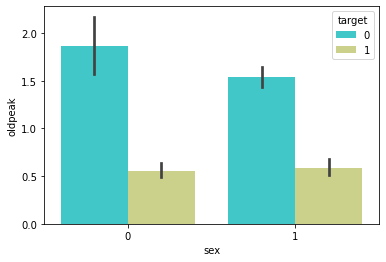

In [35]:
sns.barplot(x='sex', y='oldpeak', hue='target', palette='rainbow', data=df)

##### ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

### fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) and chest pain relation

In [36]:
df['fbs'].value_counts()

0    1130
1     198
Name: fbs, dtype: int64

<AxesSubplot:xlabel='fbs', ylabel='chol'>

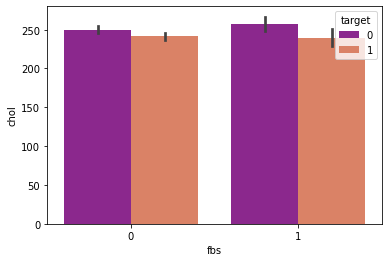

In [37]:
sns.barplot(x='fbs', y='chol', hue='target', data=df,palette='plasma' )

<AxesSubplot:xlabel='sex', ylabel='target'>

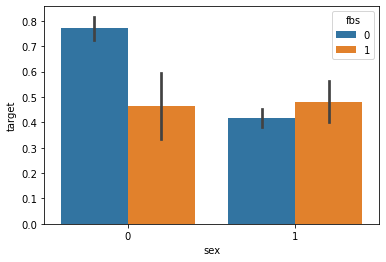

In [38]:
sns.barplot(x='sex',y='target', hue='fbs',data=df)

### Cross Tables

In [39]:
gen = pd.crosstab(df['sex'], df['target'])
print(gen)

target    0    1
sex             
0       110  298
1       527  393


<AxesSubplot:xlabel='sex'>

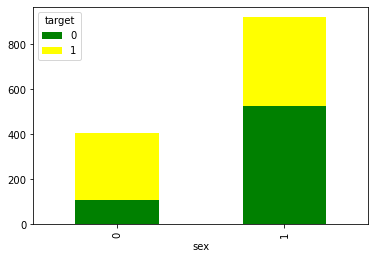

In [40]:
gen.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)

In [41]:
temp=pd.crosstab(index=df['sex'],
            columns=[df['thal']], 
            margins=True)
temp

thal  0   1    2    3   All
sex                        
0     4   5  331   68   408
1     5  77  379  459   920
All   9  82  710  527  1328

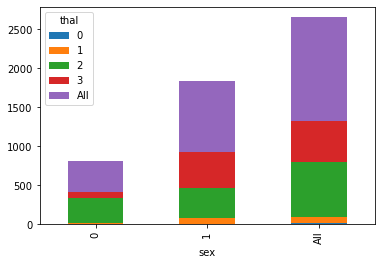

In [42]:
temp.plot(kind="bar",stacked=True)
plt.show()

In [43]:
temp=pd.crosstab(index=df['target'],
            columns=[df['thal']], 
            margins=True)
temp

thal    0   1    2    3   All
target                       
0       5  55  168  409   637
1       4  27  542  118   691
All     9  82  710  527  1328

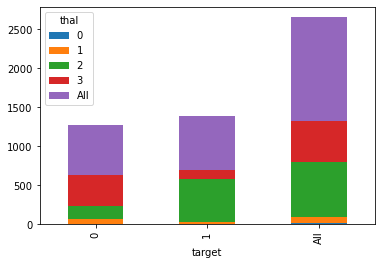

In [44]:
temp.plot(kind='bar', stacked=True)
plt.show()

In [45]:
chest_pain = pd.crosstab(df['cp'], df['target'])
chest_pain

target    0    1
cp              
0       479  161
1        42  175
2        83  288
3        33   67

<AxesSubplot:xlabel='cp'>

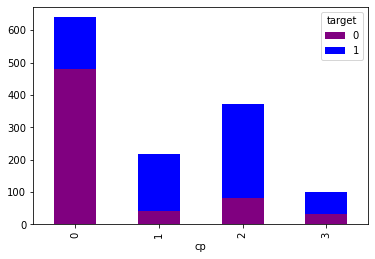

In [46]:
chest_pain.plot(kind='bar', stacked=True, color=['purple','blue'], grid=False)

# Preparing the data for Model Training

### Scaling the data

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [48]:
df.head()

age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.946358    1   3  0.764521 -0.253066    1        0  0.033279      0   
1 -1.920951    1   2 -0.092210  0.076340    0        1  1.644312      0   
2 -1.479827    0   1 -0.092210 -0.814993    0        0  0.991190      0   
3  0.174390    1   1 -0.663365 -0.194935    0        1  1.252439      0   
4  0.284671    0   0 -0.663365  2.091528    0        1  0.599318      1   

    oldpeak  slope  ca  thal  target  
0  1.055240      0   0     1       1  
1  2.079936      0   0     2       1  
2  0.286717      2   0     2       1  
3 -0.225631      2   0     2       1  
4 -0.396414      2   0     2       1

In [49]:
X= df.drop(['target'], axis=1)
y= df['target']

In [50]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

### Check the sample Size

In [51]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 12077
X_test- 5187
y_train- 929
y_test- 399


### 1- Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=5000)

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm

array([[141,  55],
       [ 12, 191]], dtype=int64)

<AxesSubplot:>

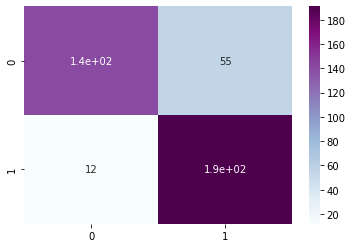

In [54]:
sns.heatmap(cm, annot=True,cmap='BuPu')

In [55]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.8320802005012531


In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.8320802005012531

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81       196
           1       0.78      0.94      0.85       203

    accuracy                           0.83       399
   macro avg       0.85      0.83      0.83       399
weighted avg       0.85      0.83      0.83       399



## 2- Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=1, min_samples_split=2)
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)

In [59]:
cm2

array([[189,   7],
       [  9, 194]], dtype=int64)

<AxesSubplot:>

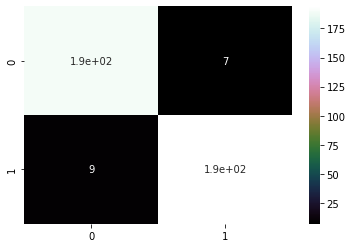

In [60]:
sns.heatmap(cm2, annot=True,cmap='cubehelix')

In [61]:
accuracy_score(y_test,prediction2)

0.9598997493734336

In [62]:
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       196
           1       0.97      0.96      0.96       203

    accuracy                           0.96       399
   macro avg       0.96      0.96      0.96       399
weighted avg       0.96      0.96      0.96       399



## 3- Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(bootstrap=False,
 max_depth=6,
 max_features='auto',
 min_samples_leaf=1,
 min_samples_split=2,
 n_estimators=10)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)

<AxesSubplot:>

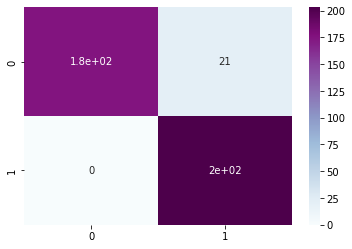

In [64]:
sns.heatmap(cm3, annot=True,cmap='BuPu')

In [65]:
accuracy_score(y_test, prediction3)

0.9473684210526315

In [66]:

print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       196
           1       0.91      1.00      0.95       203

    accuracy                           0.95       399
   macro avg       0.95      0.95      0.95       399
weighted avg       0.95      0.95      0.95       399



### 4- Support Vector Classifier

In [67]:
from sklearn.svm import SVC

svm=SVC()
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)

In [68]:
cm4

array([[156,  40],
       [ 12, 191]], dtype=int64)

<AxesSubplot:>

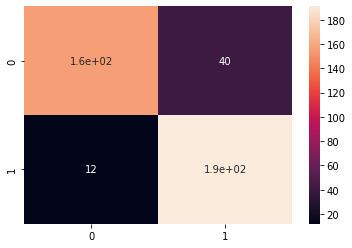

In [69]:
sns.heatmap(cm4, annot=True)

In [70]:
accuracy_score(y_test, prediction4)

0.8696741854636592

In [71]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       196
           1       0.83      0.94      0.88       203

    accuracy                           0.87       399
   macro avg       0.88      0.87      0.87       399
weighted avg       0.88      0.87      0.87       399



### 5- Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB(var_smoothing= 2e-9)
model5 = NB.fit(X_train, y_train)
prediction5 = model5.predict(X_test)
cm5=confusion_matrix(y_test, prediction5)


In [73]:
cm5

array([[153,  43],
       [ 25, 178]], dtype=int64)

<AxesSubplot:>

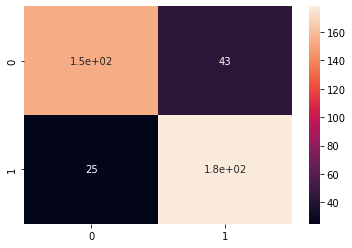

In [74]:
sns.heatmap(cm5, annot=True)

In [75]:
accuracy_score(y_test, prediction5)

0.8295739348370927

In [76]:
print(classification_report(y_test, prediction5))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       196
           1       0.81      0.88      0.84       203

    accuracy                           0.83       399
   macro avg       0.83      0.83      0.83       399
weighted avg       0.83      0.83      0.83       399



### 6- KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
model6 = KNN.fit(X_train, y_train)
prediction6 = model6.predict(X_test)
cm6=confusion_matrix(y_test, prediction5)
cm6

array([[153,  43],
       [ 25, 178]], dtype=int64)

<AxesSubplot:>

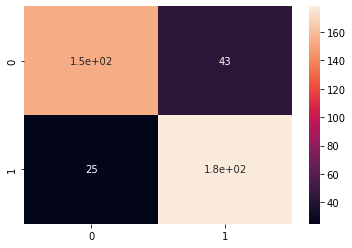

In [78]:
sns.heatmap(cm6, annot=True)

In [79]:
accuracy_score(y_test, prediction6)

0.8621553884711779

In [80]:
print(classification_report(y_test, prediction6))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       196
           1       0.83      0.92      0.87       203

    accuracy                           0.86       399
   macro avg       0.87      0.86      0.86       399
weighted avg       0.87      0.86      0.86       399



### Scores

In [81]:
print('lr :', accuracy_score(y_test, prediction1))
print('dtc :', accuracy_score(y_test, prediction2))
print('rfc :', accuracy_score(y_test, prediction3))
print('NB: ', accuracy_score(y_test, prediction4))
print('SVC :', accuracy_score(y_test, prediction5))
print('KNN :', accuracy_score(y_test, prediction6))

lr : 0.8320802005012531
dtc : 0.9598997493734336
rfc : 0.9473684210526315
NB:  0.8696741854636592
SVC : 0.8295739348370927
KNN : 0.8621553884711779


## Best accuracy is given by Random Forest : 95.7*


## Cross Validation

In [82]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model2, X_train, y_train, cv=5)
scores.mean()

0.9633594885207788

In [83]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model3, X_train, y_train, cv=5)
scores.mean()

0.9547457134553909

### Random Forest Model with Hyperparameter tuning using GridSearchCV

In [84]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4, 6, 8]
# Minimum number of samples required to split a node
min_samples_split = [2, 50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [85]:
# Create the paramaters grid
param_grid_1 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid_1)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8], 'min_samples_split': [2, 50], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [86]:
from sklearn.model_selection import GridSearchCV
E_model_1 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid_1, cv = 3, verbose=5, n_jobs = -1)
E_model_1

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 50],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=5)

In [87]:
E_model_1.fit(X_train, y_train)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 50],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=5)

In [88]:
# print(accuracy_score(y_test, E_predicted_1))
E_model_1.best_score_

0.9816856317639281

In [89]:
E_model_1.best_params_

{'bootstrap': False,
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 72}

In [90]:
E_prediction_1=E_model_1.predict(X_test)
accuracy_score(y_test, E_prediction_1)

1.0

### Decision Tree Classifier with Hyperparameter tuning using GridSearchCV

In [91]:
param_grid_2={
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_split': range(1, 10),
    'min_samples_leaf': range(1, 5)
}

In [92]:
from sklearn.model_selection import GridSearchCV
E_model_2=GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_2, cv=10, n_jobs=-1)

In [93]:
E_model_2.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)})

In [94]:
E_prediction_2=E_model_2.predict(X_test)
accuracy_score(y_test, E_prediction_2)

0.9598997493734336

In [95]:
E_model_2.best_score_

0.9838475923328657

In [96]:
E_model_2.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

### Adaboost Classifier with Hyperparameter tuning using GridSearchCV

In [97]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
ADC=AdaBoostClassifier(n_estimators=150, learning_rate=1.5)
E_model_3=ADC.fit(X_train, y_train)
E_predicted_3=E_model_3.predict(X_test)
accuracy_score(y_test, E_predicted_3)

0.9774436090225563

In [98]:
# Applying GridSearchCV
param_grid_3={
    'n_estimators': [10, 50, 75, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1, 1.5, 2],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [99]:
E_model_3=GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid_3, n_jobs=-1, cv=10, scoring='accuracy')

In [100]:
E_model_3.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 1.5, 2],
                         'n_estimators': [10, 50, 75, 100, 150, 200]},
             scoring='accuracy')

In [101]:
E_prediction_3=E_model_3.predict(X_test)
accuracy_score(y_test, E_prediction_3)

0.9849624060150376

In [102]:
E_model_3.best_score_

0.9784712482468443

In [103]:
E_model_3.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1.5, 'n_estimators': 200}

### Gradient Boost Classifier with Hyperparameter tuning using GridSearchCV

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
GBC=GradientBoostingClassifier(n_estimators=16, learning_rate=1.59)
GradientBoostingClassifier()
E_model_4=GBC.fit(X_train, y_train)
E_predicted_4=E_model_4.predict(X_test)
accuracy_score(y_test, E_predicted_4)

0.9899749373433584

In [105]:
#Applying GrirSearchCV
param_grid_4={
    'n_estimators': [10, 50, 75, 100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.5, 1.0, 1.5]
}

In [106]:
E_model_4=GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid_4, n_jobs=-1, cv=10, scoring='accuracy')
E_predicted_4=E_model_4.fit(X_train, y_train)

In [107]:
E_model_4.best_score_

0.9903225806451612

In [108]:
E_model_4.best_params_

{'learning_rate': 0.5, 'n_estimators': 150}

In [109]:
print(E_model_4)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.5, 1.0, 1.5],
                         'n_estimators': [10, 50, 75, 100, 150, 200]},
             scoring='accuracy')


### XgBoost Classifier with Hyperparameter tuning using GridSearchCV

In [110]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [111]:
from xgboost import XGBClassifier
XGB=XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=45)
E_model_5=XGB.fit(X_train, y_train)
E_predicted_5=E_model_5.predict(X_test)
accuracy_score(y_test, E_predicted_5)

0.9699248120300752

In [112]:
# Applying GridSearchCV
param_grid_5={
    'n_estimators': [10, 50, 75, 100, 175, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.4, 0.5, 0.6],
    'max_depth': [1, 2, 3, 4, 5, 6]
}

In [113]:
E_model_5=GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid_5, verbose=1, n_jobs=-1, cv=5)
E_predicted_5=E_model_5.fit(X_train, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


In [114]:
E_model_5.best_params_

{'learning_rate': 0.6, 'max_depth': 4, 'n_estimators': 75}

In [115]:
E_model_5.best_score_

0.992467306015693

### LGBM Classifier with Hyperparameter tuning using GridSearchCV

In [116]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [117]:
from lightgbm import LGBMClassifier

In [118]:
LGB=LGBMClassifier(n_estimators=45, learning_rate=0.065, num_leaves=30, random_state=42, objective='binary')
E_model_6=LGB.fit(X_train, y_train)
E_predicted_6=E_model_6.predict(X_test)
accuracy_score(y_test, E_predicted_6)



0.9849624060150376

In [119]:
# Applying GridSearchCV
param_grid_6={
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.05, 0.1, 0.3],
    'num_leaves': [20, 50, 80, 100]
}

In [120]:
E_model_6=GridSearchCV(estimator=LGBMClassifier(), param_grid=param_grid_6, verbose=1, n_jobs=-1, cv=10)
E_predicted_6=E_model_6.fit(X_train, y_train)


Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [121]:
E_model_6.best_params_

{'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 50}

In [122]:
E_model_6.best_score_

0.9946119682094438

## AUC for Ensemble Learning Models

In [123]:
from sklearn.metrics import roc_curve,roc_auc_score

### Random Forest

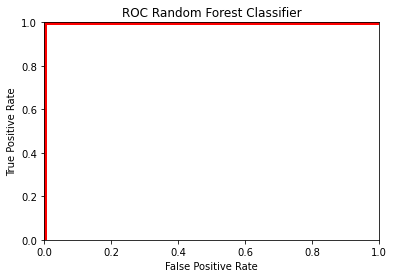

In [124]:
fpr, tpr, thresholds = roc_curve(y_test, E_model_1.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

### Decision Tree Classifier

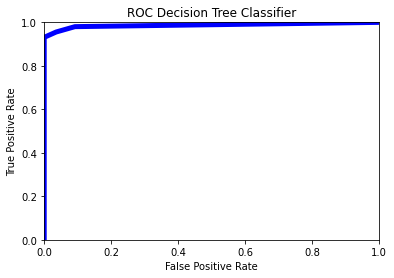

In [125]:
fpr, tpr, thresholds = roc_curve(y_test, E_model_2.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr,color='blue',lw=5)
plt.show()

### AdaBoost Classifier

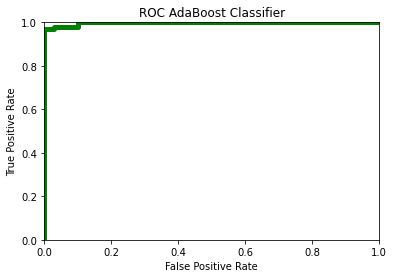

In [126]:
fpr, tpr, thresholds = roc_curve(y_test, E_model_3.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC AdaBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr,color='green',lw=5)
plt.show()

### GradientBoosting Classifier

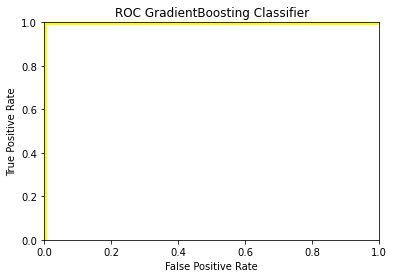

In [127]:
fpr, tpr, thresholds = roc_curve(y_test, E_model_4.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC GradientBoosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr,color='yellow',lw=5)
plt.show()

### XgBoost Classifier

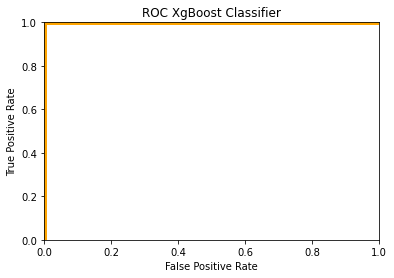

In [128]:
fpr, tpr, thresholds = roc_curve(y_test, E_model_5.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC XgBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr,color='orange',lw=5)
plt.show()

### Light GBMClassifier

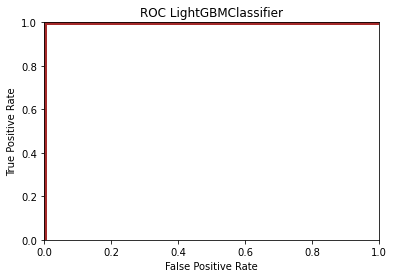

In [129]:
fpr, tpr, thresholds = roc_curve(y_test, E_model_6.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC LightGBMClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr,color='brown',lw=5)
plt.show()

## Analysis of Models

In [130]:
names=["Logistic Regression", "Decision Tree Classifier", "Random Forest", "Linear_SVM", "Polynomial_SVM", 
         "RBF_SVM", "Naive_Bayes", "KNN", "Logistic Regression_CV", 
         "Decision Tree_CV", "Adaboost_CV", "Gradient Boost_CV", "XgBoost_CV", "LGMB_CV"]


In [131]:
classifiers=[
    LogisticRegression(max_iter=5000),
    DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=1, min_samples_split=2),
    RandomForestClassifier(bootstrap=False, max_depth=6, max_features='auto', min_samples_leaf=1, min_samples_split=2, n_estimators=10),
    SVC(kernel='linear'),
    SVC(kernel='poly'),
    SVC(kernel='rbf'),
    GaussianNB(var_smoothing= 2e-9),
    KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski'),
    GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid_1, cv = 3, verbose=5, n_jobs = -1),
    GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_2, cv=10, n_jobs=-1),
    GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid_3, n_jobs=-1, cv=10, scoring='accuracy'),
    GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid_5, verbose=1, n_jobs=-1, cv=5),
    GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid_4, n_jobs=-1, cv=10, scoring='accuracy'),
    GridSearchCV(estimator=LGBMClassifier(), param_grid=param_grid_6, verbose=1, n_jobs=-1, cv=10)
]

In [132]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits
Fitting 5 folds for each of 252 candidates, totalling 1260 fits
Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [133]:
scores

[0.8320802005012531,
 0.9598997493734336,
 0.9649122807017544,
 0.8395989974937343,
 0.87468671679198,
 0.8696741854636592,
 0.8295739348370927,
 0.8621553884711779,
 0.9974937343358395,
 0.9598997493734336,
 0.9849624060150376,
 1.0,
 1.0,
 1.0]

In [134]:
df_stat = pd.DataFrame()
df_stat['name'] = names
df_stat['score'] = scores
df_stat

name     score
0        Logistic Regression  0.832080
1   Decision Tree Classifier  0.959900
2              Random Forest  0.964912
3                 Linear_SVM  0.839599
4             Polynomial_SVM  0.874687
5                    RBF_SVM  0.869674
6                Naive_Bayes  0.829574
7                        KNN  0.862155
8     Logistic Regression_CV  0.997494
9           Decision Tree_CV  0.959900
10               Adaboost_CV  0.984962
11         Gradient Boost_CV  1.000000
12                XgBoost_CV  1.000000
13                   LGMB_CV  1.000000

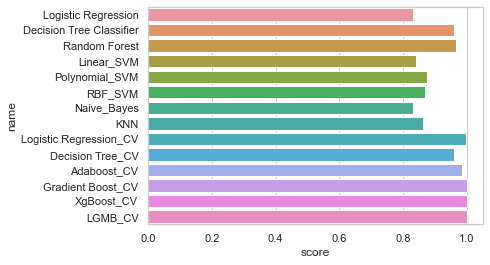

In [135]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df_stat)

AttributeError: predict_proba is not available when  probability=False

<Figure size 432x288 with 0 Axes>

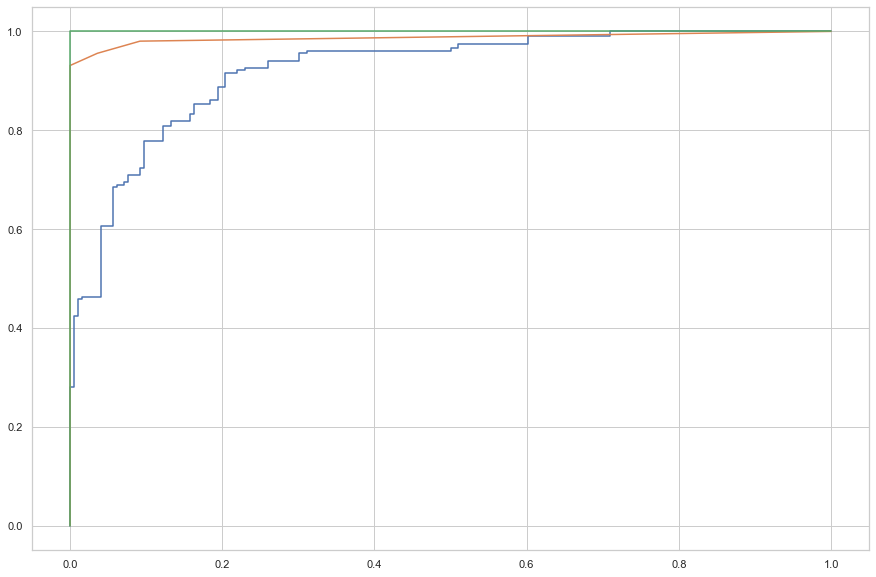

In [136]:
from sklearn import metrics
plt.figure(0).clf()

plt.figure(figsize=(15, 10))

y_pred = model1.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

y_pred = E_model_2.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC="+str(auc))


y_pred = E_model_1.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest Classifier, AUC="+str(auc))

y_pred = model4.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Support Vector Classifier, AUC="+str(auc))

y_pred = NB.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Naive Bayes, AUC="+str(auc))

y_pred = KNN.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

y_pred = E_model_3.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="AdaBoost Classifier, AUC="+str(auc))

y_pred = E_model_4.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boost, AUC="+str(auc))

y_pred = E_model_5.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))



y_pred = E_model_6.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="LGBM Classifier, AUC="+str(auc))
plt.xlim(0,1.1)
plt.ylim(0,1.1)
#add legend
plt.legend()
plt.savefig("ROCsHeart.png")
plt.show()